next steps:
1. unit test this
2. encapsulation
3. come up with VAR for all properties

These are the main differences between EPC model and CRREM:
1. EPC provides own emission estimation
2. no normalisation for months of data, coverage(max coverage/data coverage), occupancy, weather
3. no district heating/cooling
4. assume energy breakdown share

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from crrem.database import DataQ
import datetime
import warnings
warnings.filterwarnings("ignore")

In [8]:
zip_nuts

,nuts_code,nuts_year,last_updated
zip_code,,,
UKEH10,UKM73,2016,9999-02-27
UKEH17,UKM73,2016,9999-02-27
UKEH18,UKM73,2016,9999-02-27
UKEH19,UKM73,2016,9999-02-27
UKEH20,UKM73,2016,9999-02-27
...,...,...,...
UKBT79,UKN16,2016,9999-02-27
UKBT81,UKN16,2016,9999-02-27
UKBT92,UKN16,2016,9999-02-27


In [9]:
zip_nuts[zip_nuts['nuts_code']=='UKM73']

,nuts_code,nuts_year,last_updated
zip_code,,,
UKEH10,UKM73,2016,9999-02-27
UKEH17,UKM73,2016,9999-02-27
UKEH18,UKM73,2016,9999-02-27
UKEH19,UKM73,2016,9999-02-27
UKEH20,UKM73,2016,9999-02-27
UKEH21,UKM73,2016,9999-02-27
UKEH22,UKM73,2016,9999-02-27
UKEH23,UKM73,2016,9999-02-27
UKEH24,UKM73,2016,9999-02-27


In [15]:
hdd_cdd_by_nuts[120:150]

,nuts_year,cdd_2015,cdd_rcp45_pa,cdd_rcp85_pa,hdd_2015,hdd_rcp45_pa,hdd_rcp85_pa
nuts_code,,,,,,,
UKJ46,2016,16.536364,0.272727,0.445909,1575.411136,-2.907121,-4.401667
UKK11,2016,7.774167,0.162778,0.331111,1544.860833,-2.788333,-4.296667
UKK12,2016,8.095893,0.165357,0.330952,1566.092500,-2.765952,-4.249643
UKK13,2016,12.184779,0.216716,0.395588,1615.935662,-2.790931,-4.258284
UKK14,2016,13.159167,0.237222,0.421111,1626.732500,-2.842778,-4.345556
UKK15,2016,12.404286,0.229524,0.417460,1616.584524,-2.802381,-4.287302
UKK21,2016,4.095677,0.083542,0.183958,1642.759331,-2.949697,-4.399584
UKK22,2016,9.271500,0.194778,0.368333,1549.997750,-2.728833,-4.162222
UKK23,2016,7.317045,0.153788,0.312841,1556.105057,-2.772235,-4.212917


In [12]:
hdd_cdd_by_nuts_normalization[:50]

,hdd_cdd,avg,2018_lvl
nuts_lvl2,,,
UKC1,CDD,0.000000,0.00
UKC2,CDD,0.000000,0.00
UKD1,CDD,0.021333,0.00
UKD2,CDD,0.335333,0.00
UKD3,CDD,0.512667,0.00
UKD4,CDD,0.379333,0.00
UKD5,CDD,0.475333,0.00
UKE1,CDD,0.168000,1.20
UKE2,CDD,0.016667,0.01


In [2]:
#impport raw data
target_level = DataQ("select * from crrem.target_levels").data
target_type = DataQ("select * from crrem.target_type").data
property_type = DataQ("select * from crrem.vw_epc_to_crrem_prop_type").data
country = DataQ("select * from crrem.country").data
country_factor = DataQ("select * from crrem.country_factor").data
currency = DataQ("select * from crrem.currency").data
energy_source = DataQ("select * from crrem.energy_source").data
price = DataQ("select * from crrem.price").data
price.set_index('year', inplace=True)
price['price'] = price['price'].astype(float)
epc_main_fuel_mapping = DataQ("select * from crrem.epc_main_fuel_mapping").data
scenario_gw = DataQ("select * from crrem.scenario_gw").data
zip_nuts = DataQ("select * from crrem.zip_to_nuts").data
zip_nuts.set_index('zip_code', inplace=True)
energy_use_type = DataQ("select * from crrem.energy_use_type").data
hdd_cdd_by_nuts = DataQ("select * from crrem.hdd_cdd_by_nuts").data
hdd_cdd_by_nuts.set_index('nuts_code', inplace=True)
for col in hdd_cdd_by_nuts.columns[1:]: #impute missing values with mean
    median = hdd_cdd_by_nuts[col].median(skipna=True)
    hdd_cdd_by_nuts.loc[hdd_cdd_by_nuts[col]==0, col] = median
hdd_cdd_by_nuts_normalization = DataQ("select * from crrem.hdd_cdd_by_nuts_normalization").data
hdd_cdd_by_nuts_normalization.set_index('nuts_lvl2', inplace=True)
vw_emission_factors = DataQ("select * from crrem.vw_emission_factors").data
vw_emission_factors.set_index('factor_year', inplace=True)
vw_emission_factors_others = DataQ("select * from crrem.vw_emission_factors_others").data
vw_emission_factors_others.set_index('energy_name', inplace=True)
property_use_type = DataQ("select * from crrem.property_use_type").data
property_use_type.set_index('use_type_name', inplace=True)
vw_gwp = DataQ("select * from crrem.vw_gwp").data
vw_gwp.set_index('gas_name',inplace=True)
vw_energy_use_per_type_country = DataQ("select * from crrem.vw_energy_use_per_type_country").data
vw_share_per_month_region = DataQ("select * from crrem.vw_share_per_month_region").data
vw_share_per_month_region.set_index('type',inplace=True)
vw_energy_cons_per_month_region = DataQ("select * from crrem.vw_energy_cons_per_month_region").data

In [3]:
class Building:
    def __init__(self, building_details, building_price, crrem_data):
        #add 7 EPC columns as property_details, in a json object
        if crrem_data == 'crrem':
            self.epc = building_details
        elif crrem_data == 'uk_epc': 
            if type(building_details) is int:
                epc = DataQ(f"""select * from public.epcsourcedata where "BUILDING_REFERENCE_NUMBER" = {building_details} """).data
                self.epc = epc.set_index('BUILDING_REFERENCE_NUMBER')
            elif type(building_details) is dict:
                #convert row of json to dataframe row
                self.epc = pd.DataFrame(data=building_details,index=[0])
        self.building_price = building_price
        self.stranding_year = None
        self.loss_vlaue = None

    def VAR(self, target_temp=1.5, RCP_scenario=4.5, discount_factor=0.02, end_year=2050, Diagram=False, crrem_data='uk_epc'):
    # /////////////////////////////////////////////////////////////////
    # Original CRREM Model
    # ///////////////////////////////////////////////////////////////// 
        if crrem_data == 'crrem':
            ## Estimate current emissions
            #set range of years for analysis
            years = list(range(2018,end_year+1))
            '''
            a. data normalisation
            '''
            #1. weather noramlisation: heat/cool
            #AR, country acronym, set to UK 
            AR = 'UK'

            #AP: NUTS3
            ZIP = AR + str(self.epc['input_O'])
            AP = zip_nuts.loc[ZIP]['nuts_code'].iloc[0]

            cdd_level = hdd_cdd_by_nuts_normalization.loc[hdd_cdd_by_nuts_normalization['hdd_cdd'] == 'CDD']
            hdd_level = hdd_cdd_by_nuts_normalization.loc[hdd_cdd_by_nuts_normalization['hdd_cdd'] == 'HDD']
            try:
                if cdd_level.loc[AP[:4]]['2018_lvl']!=0:
                    AXA = cdd_level.loc[AP[:4]]['avg']/cdd_level.loc[AP[:4]]['2018_lvl']
                elif cdd_level.loc[AP[:4]]['2018_lvl']==0:
                    AXA = 1

                if hdd_level.loc[AP[:4]]['2018_lvl']!=0:
                    AWZ = hdd_level.loc[AP[:4]]['avg']/hdd_level.loc[AP[:4]]['2018_lvl']
                elif hdd_level.loc[AP[:4]]['2018_lvl']==0:
                    AWZ = 1
            except KeyError:
                AXA = 1
                AWZ = 1
                
            #2. data coverage normalisation
            if self.epc['input_AQ']!= 0:
                AWT = self.epc['input_AR']/self.epc['input_AQ']
            else:
                AWT = 0

            if self.epc['input_AG']!= 0:
                AWQ = self.epc['input_AR']/self.epc['input_AG']
            else:
                AWQ = 0

            if self.epc['input_AJ']!= 0:
                AWR = self.epc['input_AR']/self.epc['input_AJ'] 
            else:
                AWR= 0

            if self.epc['input_AM']!= 0:
                AWS = self.epc['input_AR']/self.epc['input_AM'] 
            else:
                AWS = 0

            if self.epc['input_AU']!= 0:
                AWU = self.epc['input_AR']/self.epc['input_AU'] 
            else:
                AWU = 0

            if self.epc['input_AY']!= 0:
                AWV = self.epc['input_AR']/self.epc['input_AY'] 
            else:
                AWV = 0

            #3. month noramlisation
            AWX = 12/self.epc['input_AJ'] #month normalisation

            #4. vacant area normalisation
            AWY = self.epc['input_AR']/(self.epc['input_AR']-self.epc['input_AD']) 

            #5. Electricity normalisation by month across different regions(North Atlantic, Continental, Mediterranean)
            #CTX - CUS
            #CTZ - starting month number
            CTZ = datetime.datetime.strptime(self.epc['input_I'], "%B").month

            #CUA - ending month number
            CUA = CTZ + self.epc['input_J'] - 1
            #CUB_CUM: Month included

            months = list(range(1,13))
            CUB_CUM = list(range(1,13))
            for month in months:
                if (month >= CTZ and month <= CUA) or (month+12 >= CTZ and month+12 <= CUA):
                        CUB_CUM[month-1] = 1
                else:
                    CUB_CUM[month-1] = 0

            #CTX/CTY/CUN
            CUB_CUM_i = pd.DataFrame(CUB_CUM).reset_index().drop(['index'], axis = 1)
            CUS = 1/(CUB_CUM_i*pd.DataFrame(vw_energy_cons_per_month_region['percentage'][-12:]).reset_index().drop(columns='index').rename(columns = {'percentage': 0})).sum()[0]

            #CUO: Heat_norm_12
            CUN3 = pd.DataFrame(vw_share_per_month_region.loc[vw_share_per_month_region.index=='1']['percentage'])
            CUN3 = CUN3.reset_index().drop(columns='type').rename(columns = {'percentage': 0})
            CUO = 1/(CUB_CUM_i * CUN3).sum()[0]

            #CUQ: Cool_norm_12
            CUP3 = pd.DataFrame(vw_share_per_month_region.loc[vw_share_per_month_region.index=='2']['percentage'])
            CUP3 = CUP3.reset_index().drop(columns='type').rename(columns = {'percentage': 0})
            CUQ = 1/(CUB_CUM_i * CUP3).sum()[0]

            '''
            b. BI_CO - HDD index and CT_DZ - CDD index
            '''

            #BI_CO - HDD index
            BI_CO = pd.Series(0.0,index=years)
            for year in years:
                if RCP_scenario == 4.5:
                    BI_CO[year] = ((hdd_cdd_by_nuts.loc[AP]['hdd_2015'] + (year-2015)*hdd_cdd_by_nuts.loc[AP]['hdd_rcp45_pa'])/(hdd_cdd_by_nuts.loc[AP]['hdd_2015'] + 3*hdd_cdd_by_nuts.loc[AP]['hdd_rcp45_pa']))
                elif RCP_scenario == 8.5:
                    BI_CO[year] = ((hdd_cdd_by_nuts.loc[AP]['hdd_2015'] + (year-2015)*hdd_cdd_by_nuts.loc[AP]['hdd_rcp85_pa'])/(hdd_cdd_by_nuts.loc[AP]['hdd_2015'] + 3*hdd_cdd_by_nuts.loc[AP]['hdd_rcp85_pa']))
            BI_CO = BI_CO[:end_year-2018+1]
            
            #CT_DZ - CDD index
            CT_DZ = pd.Series(0.0,index=years)
            for year in years:
                if RCP_scenario == 4.5:
                    CT_DZ[year] = ((hdd_cdd_by_nuts.loc[AP]['cdd_2015'] + (year-2015)*hdd_cdd_by_nuts.loc[AP]['cdd_rcp45_pa'])/(hdd_cdd_by_nuts.loc[AP]['cdd_2015'] + 3*hdd_cdd_by_nuts.loc[AP]['cdd_rcp45_pa']))
                elif RCP_scenario == 8.5:
                    CT_DZ[year] = ((hdd_cdd_by_nuts.loc[AP]['cdd_2015'] + (year-2015)*hdd_cdd_by_nuts.loc[AP]['cdd_rcp85_pa'])/(hdd_cdd_by_nuts.loc[AP]['cdd_2015'] + 3*hdd_cdd_by_nuts.loc[AP]['cdd_rcp85_pa']))
            CT_DZ = CT_DZ[:end_year-2018+1]
            
            '''
            c. KA:KH: emission share
            '''
            #KA: export emission
            A32_year = vw_emission_factors.loc[self.epc['input_F']]['value']

            #slice A32 for UK 2018
            A32_UK_base = vw_emission_factors.loc[years[0]]['value']

            #slice A32 for 2018
            A32_base = vw_emission_factors.loc[years[0]]['value']

            KA = -AWT*self.epc['input_BQ']*vw_emission_factors_others.loc['District Heating (Steam)']['kgco2e_per_kwh']-AWQ*self.epc['input_BL']*A32_year

            #JT - JZ
            #JT - Electricity emission
            JT = AWQ*(self.epc['input_AF']-self.epc['input_BM'])*A32_base + self.epc['input_BM']*A32_year

            #JU - Gas emission
            JU = AWR*self.epc['input_AI']*vw_emission_factors_others.loc['Natural Gas']['kgco2e_per_kwh']

            #JV - Oil emission
            JV = AWS*self.epc['input_AL']*vw_emission_factors_others.loc['Fuel Oil']['kgco2e_per_kwh']

            #JW - District heating emission
            JW = AWT*self.epc['input_AO']*vw_emission_factors_others.loc['District Heating (Steam)']['kgco2e_per_kwh']*A32_base/A32_UK_base

            #JX - District cooling emission
            JX = AWU*self.epc['input_AS']*vw_emission_factors_others.loc['District Heating (Steam)']['kgco2e_per_kwh']*A32_base/A32_UK_base

            #JY - Other emission # can add another
            JY = 0
            for energy, amount in zip(self.epc['input_AW'],self.epc['input_AX']):
                emission_factor = vw_emission_factors_others.loc[energy]['kgco2e_per_kwh']
                JY += AWV*amount*emission_factor

            #JZ - Fugitive emission  # can add another
            #fugitive gas - global warming potential
            C63_BF = vw_gwp.loc[self.epc['input_BF']]['gwp']
            AT = C63_BF*self.epc['input_BG'] #leak
            JZ = AT

            #Total emission calculation
            #KJ: AS.LENG_norm 
            KJ = JT*CUS+(JU+JV+JW+JY)*CUO+JX*CUQ+JZ*AWX+KA*AWX

            # KB: Electricity emission share
            KB = JT/(JT+JU+JV+JW+JX+JY+JZ)

            # KC: Gas emission share
            KC = JU/(JT+JU+JV+JW+JX+JY+JZ)

            # KD: Oil emission share
            KD = JV/(JT+JU+JV+JW+JX+JY+JZ)

            # KE: Gas emission share
            KE = JW/(JT+JU+JV+JW+JX+JY+JZ)

            # KF: Gas emission share
            KF = JX/(JT+JU+JV+JW+JX+JY+JZ)

            # KG: Gas emission share
            KG = JY/(JT+JU+JV+JW+JX+JY+JZ)

            # KH: Gas emission share
            KH = JZ/(JT+JU+JV+JW+JX+JY+JZ)

            '''
            d. KK: final total emissions(kgCO2e)
            '''
            KK = -KA+(KJ+KA)*(AWY*KB*(1+(vw_energy_use_per_type_country['percentage'][1]/100)*(BI_CO[years[0]]*AWZ-1) 
                        + vw_energy_use_per_type_country['percentage'][0]/100*(CT_DZ[years[0]]*AXA-1)) + (KC+KD+KE)
                        * (1+(vw_energy_use_per_type_country['percentage'][2]/100*(BI_CO[years[0]]*AWZ-1)))*AWZ+KF*AXA)

            '''
            e. EE_FK: grid index
            '''
            EE_FK = pd.Series(0.0,index=years)
            for year in years:
                EE_FK[year] = (vw_emission_factors.loc[year]['value']/vw_emission_factors.loc[years[0]]['value'])

            '''
            f. CZZ_DBF: Electricity procurement
            '''
            CZZ = AWQ*self.epc['input_AF']*AWY*((1+(vw_energy_use_per_type_country['percentage'][1]/100*(BI_CO[years[0]]*AWZ-1))+(vw_energy_use_per_type_country['percentage'][0]/100*(CT_DZ[years[0]]*AXA-1))))*CUS
            '''
            g. KP: emissions projection(kgCO2e)
            '''
            KP = pd.Series(0.0,index=years)
            for year in years:
                KP[year] = KK*(KB*(((EE_FK[year]/EE_FK[years[0]])*(self.epc['input_AF']/CZZ)
                +(1-self.epc['input_AF']/CZZ))*(1+vw_energy_use_per_type_country['percentage'][1]/100*(BI_CO[year]-1))) + (KC+KD+KG)*
                (BI_CO[year]/BI_CO[years[0]])*(1+vw_energy_use_per_type_country['percentage'][2]/100*(BI_CO[year]-1))
                + KF*(CT_DZ[year]/CT_DZ[years[0]]) + KE*BI_CO[year]+KH)

            '''
            h. MA: emissions intensity projection(kgCO2e/m2)
            '''
            MA = KP/self.epc['input_AC']

            '''
            i. emission_target
            '''
            property_type_id = property_use_type.loc[self.epc['input_Q']]['prop_use_type_id']

            # specify target based on property type/target type/scenario
            years = list(range(2018,end_year+1))
            if target_temp == 1.5:
                gw_scenario_id = 1
            elif target_temp == 2.0:
                gw_scenario_id = 2
            emission_target = target_level[(target_level['prop_use_type_id']==property_type_id) & (target_level['target_type_id']==1) & (target_level['gw_scenario_id']==gw_scenario_id)]['target_level']
            emission_target = emission_target[:end_year-2018+1]
            emission_target.index = years

            '''
            j. VAR
            '''
            ## VAR calculation
            floor_area = self.epc['input_AC']
            emission = MA[:end_year-2018+1]
            total_emission = emission * floor_area
            total_target = emission_target * floor_area
            carbon_price = price[price['source']=='carbon']['price'][:end_year-2018+1]
            excess_cost = carbon_price * (total_emission - total_target)

            costs = pd.Series(np.nan, index=years)
            value = pd.Series(np.nan, index=years)
            for year in years:
                if excess_cost[year] < 0:
                    costs[year] = 0
                    value[year] = excess_cost[year]
                else:
                    costs[year] = excess_cost[year]
                    value[year] = 0

            discount_costs = costs.tolist().copy()
            discount_value = value.tolist().copy()

            for year in years:
                discount_costs[year - 2018] = discount_costs[year - 2018] / (1 + discount_factor) ** (year - 2018)
                discount_value[year - 2018] = discount_value[year - 2018] / (1 + discount_factor) ** (year - 2018)

            VAR = (sum(discount_costs) + sum(discount_value)) / self.building_price
            
            #stranding year and loss value
            stranding = emission_target - emission
            self.stranding_year = stranding[stranding < 0].index[0]
            self.loss_value = sum(discount_costs) + sum(discount_value)
            
            '''
            k. Plotting
            '''
            if Diagram == True:
                #import MA as emission metric
                Baseline = [emission.iloc[0]]*len(emission) #create baseline pandas series with same index as climate_grid
                baseline = pd.Series(Baseline, index = emission.index)   

                #plot diagram
                plt.figure(figsize = (20,10))
                plt.plot(emission_target, 'g', label = 'Decarbonisation target')
                plt.plot(emission, 'k', label = 'Climate and grid corrected asset performance')
                plt.plot(baseline, ':k', label = 'Baseline asset performance')
                plt.plot(baseline.iloc[[0]],'kD', markersize = 10, label = '2018 performance') 

                #highlight stranding year
                plt.plot(emission[[self.stranding_year]], 'ro', markersize = 20, label = 'Stranding')

                #Excess emissions
                plt.fill_between(years, emission_target.tolist(), emission.tolist(), where = (emission_target < emission), color='C1', alpha=0.3, label = 'Excess emissions')
                plt.legend(loc = 'best', fontsize = 12)

                #set title and axis labels
                plt.title(f'Stranding Diagram', fontsize = 25)
                plt.xlabel('Year', fontsize = 15)
                plt.ylabel('GHG intensity [kgCO2e/m²/a]', fontsize = 15)
                plt.show()
            
    # /////////////////////////////////////////////////////////////////
    # EPC Model
    # /////////////////////////////////////////////////////////////////  
        elif crrem_data == 'uk_epc':
            '''
            a. Data preparation GHG emission target
            '''
            # find property type id
            property_type_id = property_type.loc[property_type['epc_prop_type'] == self.epc['PROPERTY_TYPE'].iloc[0]]['prop_use_type_id'].iloc[0]

            # specify target based on property type/target type/scenario
            years = list(range(2018,end_year+1))
            if target_temp == 1.5:
                gw_scenario_id = 1
            elif target_temp == 2.0:
                gw_scenario_id = 2
            emission_target = target_level[(target_level['prop_use_type_id']==property_type_id) & (target_level['target_type_id']==1) & (target_level['gw_scenario_id']==gw_scenario_id)]['target_level']
            emission_target = emission_target[:end_year-2018+1]
            emission_target.index = years

            # HDD/CDD projection
            # HDD - HDD index
            RCP = 'RCP' + str(RCP_scenario)

    #         if self.epc['POSTCODE'].iloc[0] != 0:
    #             NUTS3 = 'UK' + self.epc['POSTCODE'].iloc[0].split(' ')[0]

            years_index = list(range(3, 36))
            HDD = pd.DataFrame(columns=years_index, index=[1])
            for year in years_index:
                if RCP == 'RCP4.5':
                    if len(self.epc['NutsCode']) > 1:
                        HDD.iloc[0, year - 3] = (hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_2015'].iloc[0] + year *
                                                 hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_rcp45_pa'].iloc[0]) / (
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']][
                                                                'hdd_2015'].iloc[0] + 3 *
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_rcp45_pa'].iloc[0])
                    else:
                        HDD.iloc[0, year - 3] = (hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_2015'].iloc[0] + year *
                                                 hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_rcp45_pa'].iloc[0]) / (
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_2015'].iloc[0] + 3 *
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_rcp45_pa'].iloc[0])
                elif RCP == 'RCP8.5':
                    if len(self.epc['NutsCode']) > 1:
                        HDD.iloc[0, year - 3] = (hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_2015'].iloc[0] + year *
                                                 hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_rcp85_pa'].iloc[0]) / (
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']][
                                                                'hdd_2015'].iloc[0] + 3 *
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_rcp85_pa'].iloc[0])
                    else:
                        HDD.iloc[0, year - 3] = (hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_2015'].iloc[0] + year *
                                                 hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_rcp85_pa'].iloc[0]) / (
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_2015'].iloc[0] + 3 *
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['hdd_rcp85_pa'].iloc[0])

            # assumption1: if one zip macthes multiple nuts, take the first nuts
            # CDD - CDD index
            CDD = pd.DataFrame(columns=years_index, index=[1])
            for year in years_index:
                if RCP == 'RCP4.5':
                    if len(self.epc['NutsCode']) > 1:
                        CDD.iloc[0, year - 3] = (hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_2015'].iloc[0] + year *
                                                 hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_rcp45_pa'].iloc[0]) / (
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']][
                                                                'cdd_2015'].iloc[0] + 3 *
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_rcp45_pa'].iloc[0])
                    else:
                        CDD.iloc[0, year - 3] = (hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_2015'].iloc[0] + year *
                                                 hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_rcp45_pa'].iloc[0]) / (
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_2015'].iloc[0] + 3 *
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_rcp45_pa'].iloc[0])
                else:
                    if len(self.epc['NutsCode']) > 1:
                        CDD.iloc[0, year - 3] = (hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_2015'].iloc[0] + year *
                                                 hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_rcp85_pa'].iloc[0]) / (
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']][
                                                                'cdd_2015'].iloc[0] + 3 *
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_rcp85_pa'].iloc[0])
                    else:
                        CDD.iloc[0, year - 3] = (hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_2015'].iloc[0] + year *
                                                 hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_rcp85_pa'].iloc[0]) / (
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_2015'].iloc[0] + 3 *
                                                            hdd_cdd_by_nuts.loc[self.epc['NutsCode']]['cdd_rcp85_pa'].iloc[0])
            CDD.columns = list(range(2018, 2051))
            HDD.columns = list(range(2018, 2051))
            HDD.fillna(0, inplace=True)
            CDD.fillna(0, inplace=True)
            HDD = HDD.iloc[:,:end_year-2018+1]
            CDD = CDD.iloc[:,:end_year-2018+1]

            '''
            b. GHG emission projection
            '''
            # emission data
            #impute missing data with median of property type
            if self.epc['CO2_EMISS_CURR_PER_FLOOR_AREA'].iloc[0] == None:
                current_emission = self.epc['CO2_EMISS_CURR_PER_FLOOR_AREA_Median'].iloc[0]
            else:
                current_emission = self.epc['CO2_EMISS_CURR_PER_FLOOR_AREA'].iloc[0]
            if self.epc['ENERGY_CONSUMPTION_CURRENT'].iloc[0] == None:
                current_energy = self.epc['ENERGY_CONSUMPTION_CURRENT_Median'].iloc[0]
            else:
                current_energy = self.epc['ENERGY_CONSUMPTION_CURRENT'].iloc[0]
                
            elec_heat = vw_energy_use_per_type_country['percentage'][1] / 100  # share of electricity for heating in UK
            elec_cool = vw_energy_use_per_type_country['percentage'][0] / 100
            fuel_heat = vw_energy_use_per_type_country['percentage'][2] / 100
            grid = vw_emission_factors['value']  # emission factor for UK
            start = grid[2018]
            for i in grid.index:
                grid[i] = grid[i]/start

            # electricity usage share
            electricity_share = epc_main_fuel_mapping.loc[epc_main_fuel_mapping['epc_main_fuel'] == self.epc['MAIN_FUEL'].iloc[0]]['weight_elec'].iloc[0]
            elec_energy = current_energy*electricity_share
            elec_procured = elec_energy*((1+(elec_heat*(HDD.iloc[0, 0]-1)+elec_cool*(CDD.iloc[0, 0]-1))))

            emission = pd.Series(0, index=list(range(2018, 2051)))
            # assumption 2: district heating/cooling and fugitive emission not considered
            for year in years:
                emission.iloc[year - 2018] = current_emission*(electricity_share*(((grid[year]/grid[2018])
                            *(elec_energy/elec_procured)+(1-elec_energy/elec_procured))
                            *(1+elec_heat*(HDD.iloc[0, year-2018]-1)+elec_cool*(CDD.iloc[0, year-2018]-1)))
                            +(1 - electricity_share)*(HDD.iloc[0, year - 2018]/HDD.iloc[0, 2018 - 2018])
                            *(1 + fuel_heat*(HDD.iloc[0, year - 2018])))

            emission = emission[:end_year-2018+1]
            emission_baseline = pd.Series(emission[2018])
            emission_baseline = emission_baseline.repeat(len(emission.T))
            emission_baseline.index = years 
            emission_excess = emission - emission_target
            if len(emission_excess[emission_excess > 0]) == 0:
                emission_stranding_year = 2050
            else:
                emission_stranding_year = emission_excess[emission_excess > 0].index[0]

            '''
            c. VAR
            '''
            carbon_price = price[price['source']=='carbon']['price'][:end_year-2018+1] #carbon price incl. VAT
            floor_area = self.epc['TOTAL_FLOOR_AREA'].iloc[0]
            total_emission = emission * floor_area
            total_target = emission_target * floor_area
            excess_cost = carbon_price * (total_emission - total_target)

            costs = pd.Series(np.nan, index=years)
            value = pd.Series(np.nan, index=years)
            for year in years:
                if excess_cost[year] < 0:
                    costs[year] = 0
                    value[year] = excess_cost[year]
                else:
                    costs[year] = excess_cost[year]
                    value[year] = 0

            discount_costs = costs.tolist().copy()
            discount_value = value.tolist().copy()

            for year in years:
                discount_costs[year - 2018] = discount_costs[year - 2018] / (1 + discount_factor) ** (year - 2018)
                discount_value[year - 2018] = discount_value[year - 2018] / (1 + discount_factor) ** (year - 2018)

            VAR = (sum(discount_costs) + sum(discount_value)) / self.building_price
            self.stranding_year = emission_stranding_year
            self.loss_value = sum(discount_costs) + sum(discount_value)
            
            '''
            d. Plotting
            '''
            if Diagram == True:
                years = list(range(2018,end_year+1))
                plt.figure(figsize = (20,10))
                plt.plot(emission_target, 'g', label = 'Decarbonisation emission_target')
                plt.plot(emission, 'k', label = 'Climate and grid corrected asset performance')
                plt.plot(emission_baseline, ':k', label = 'emission_baseline asset performance')
                plt.plot(emission_baseline.iloc[[0]],'kD', markersize = 10, label = '2018 performance') 

                #highlight stranding year
                plt.plot(emission[[self.stranding_year]], 'ro', markersize = 20, label = 'Stranding')

                #Excess emissions
                plt.fill_between(years, emission_target.tolist(), emission.tolist(), where = (emission_target < emission), color='C1', alpha=0.3, label = 'Excess emissions')
                plt.legend(loc = 'best', fontsize = 12)

                #set title and axis labels
                plt.title(f'Stranding Diagram(Asset #{self.epc.index.tolist()[0]})', fontsize = 25)
                plt.xlabel('Year', fontsize = 15)
                plt.ylabel('GHG intensity [kgCO2e/m²/a]', fontsize = 15)
                plt.show()

        return VAR

In [4]:
class Portfolio:
    def __init__(self, buildings):
        self.buildings = buildings
    
    def add_building(self, building):
        self.buildings.append(building)
        
    def VAR(self,target_temp=1.5, RCP_scenario=4.5, discount_factor=0.02, end_year=2050, Diagram=False, crrem_data='uk_epc'):
        total_loss = 0
        total_price = 0
        years = list(range(2018,end_year+1))
        
        strand_buildings = pd.Series(0, index=years)
        for building in self.buildings:
            building.VAR(target_temp=target_temp, RCP_scenario=RCP_scenario, discount_factor=discount_factor, end_year=end_year, Diagram=False, crrem_data=crrem_data)
            total_loss += building.loss_value
            total_price += building.building_price
            if building.stranding_year < end_year:
                strand_buildings[building.stranding_year] += 1
        if Diagram == True:
            strand_buildings = strand_buildings.cummax()
            plt.figure(figsize = (20,10))
            plt.plot(strand_buildings, 'g', label = 'Decarbonisation emission_target')
            plt.title('Number of stranding assets over time', fontsize=25)
            plt.show()          
        return total_loss/total_price

In [4]:
DataQ(f"""select * from public.epcsourcedata where "BUILDING_REFERENCE_NUMBER" = {5336094578} """).data

,BUILDING_REFERENCE_NUMBER,PROPERTY_GROUPING,PROPERTY_TYPE,POSTCODE,CO2_EMISS_CURR_PER_FLOOR_AREA,MAIN_FUEL,ENERGY_CONSUMPTION_CURRENT,TOTAL_FLOOR_AREA,CO2_EMISS_CURR_PER_FLOOR_AREA_Median,ENERGY_CONSUMPTION_CURRENT_Median,NutsCode
0,5336094578,Domestic,House,TS25 5HS,66.0,mains gas (not community),375,101.0,43.0,239,UKC11


In [54]:
json1 ={"input_F" : 2018, #reporting year
        "input_I" : 'January', #starting month
        "input_J" : 10, #months of data for the reporting year
        "input_O" : 'SW1V', #ZIP code, UK provide first part of postcode
        "input_Q" : 'Office', #property type
        "input_AF" : 120000, #electricity usage (kwh)
        "input_AI" : 300000, #natural gas usage (kwh)
        "input_AL" : 0, #fuel oil usage (kwh)
        "input_AO" : 10000, #district heating(steam) usage (kwh)
        "input_AS" : 2000, #district cooling(chilled water) usage (kwh)
        "input_AW" : ['Biogas'], #type of other energy source
        "input_AX" : [20000], #other energy usage (kwh)
        "input_AC" : 6000, #total gross internal area (m2 according to IPMS 2)
        "input_AD" : 300, #average annual vacant area
        "input_AR" : 6000, #heating data coverage area
        "input_AG" : 6000,#electricity data coverage area
        "input_AJ" : 5500,#natural gas data coverage area
        "input_AM" : 0,#fuel oil data coverage area
        "input_AU" : 5000,#district cooling data coverage area
        "input_AY" : 5000,#other energy data coverage area
        "input_AQ" : 5500,#district heating data coverage area
        "input_BF" : 'Carbon dioxide',#fugitive emission type of gas
        "input_BG" : 10,#amount of leakage(kg)
        "input_BK" : 0,#on-site renewable electricity (PV, wind) generated  and consumed on-site
        "input_BL" : 0,#on-site renewable electricity (PV, wind) generated on-site and exported(kwh)
        "input_BM" : 0,#off-site renewable electricity Generated off-site and consumed on-site(kwh)
        "input_BQ" : 0,#other on-site renewable energy source (heatpump, solar thermal) generated on-site and exported
      }

In [60]:
d = Building(json1,2000000,crrem_data='crrem')

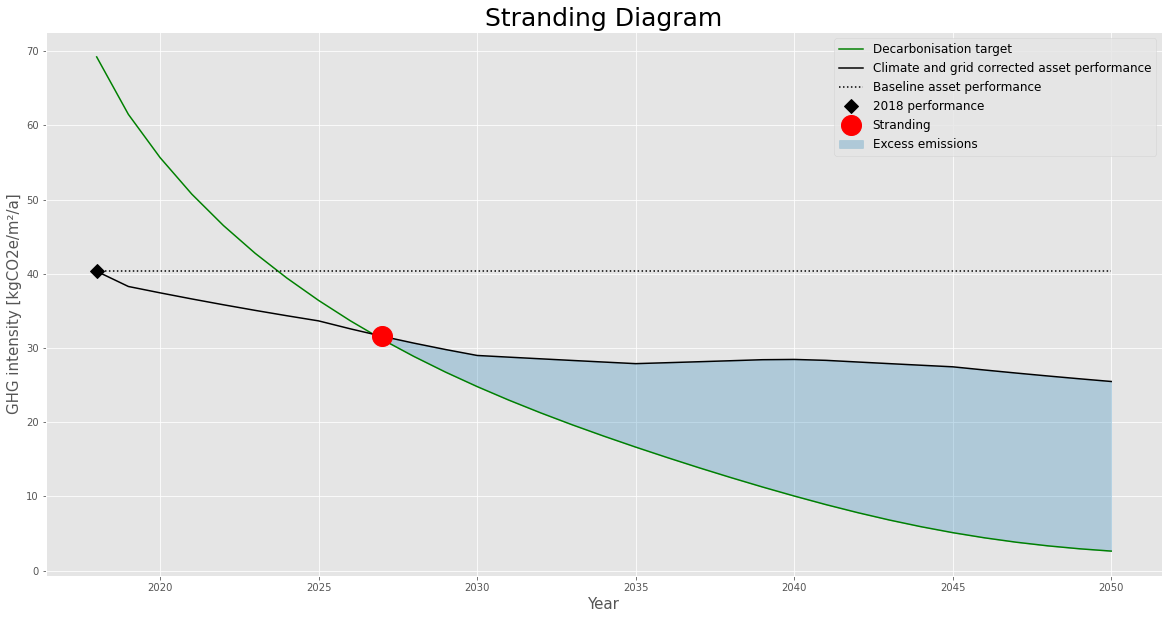

0.06327789994310055

In [61]:
d.VAR(target_temp=1.5,crrem_data='crrem',Diagram=True)

In [57]:
a = Building(5336094578,500000,crrem_data='uk_epc')
b = Building(2544846278,500000,crrem_data='uk_epc')

# json = {'PROPERTY_GROUPING':'Domestic','PROPERTY_TYPE':'House',
#         'CO2_EMISS_CURR_PER_FLOOR_AREA': 66.0,'MAIN_FUEL':'mains gas (not community)',
#        'ENERGY_CONSUMPTION_CURRENT':375,'TOTAL_FLOOR_AREA':101.0,'NutsCode':'UKC11'}
# c = Building(json,500000,crrem_data='uk_epc')
buildings = [a,b]

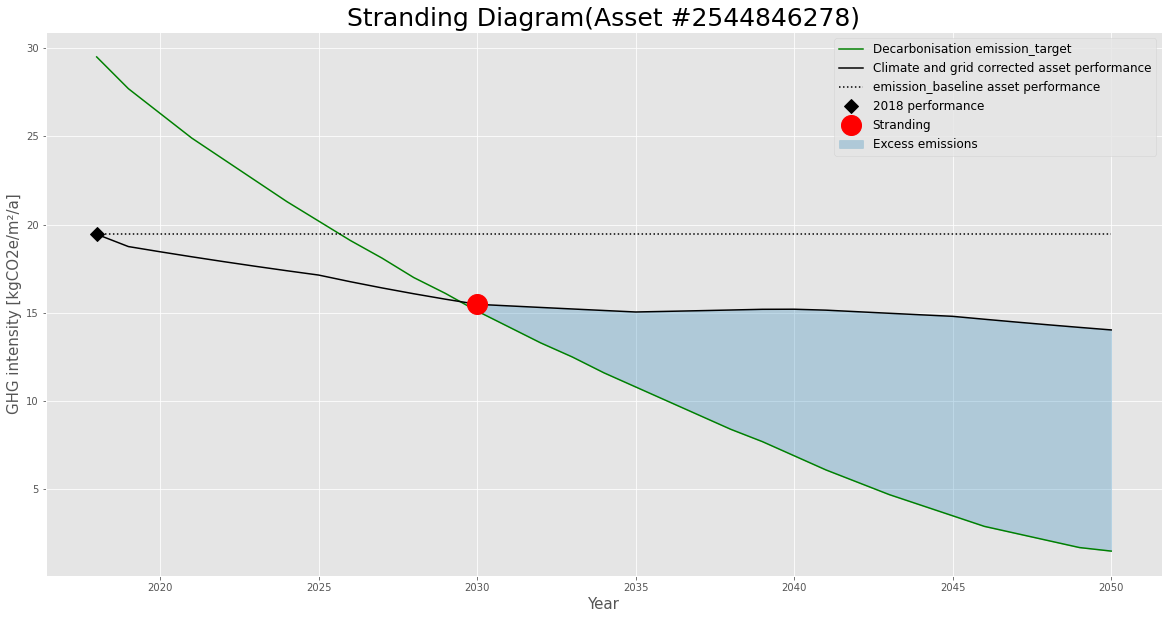

0.0007016477694660668

In [58]:
b.VAR(Diagram=True,end_year=2050,crrem_data='uk_epc')

In [246]:
p = Portfolio(buildings)

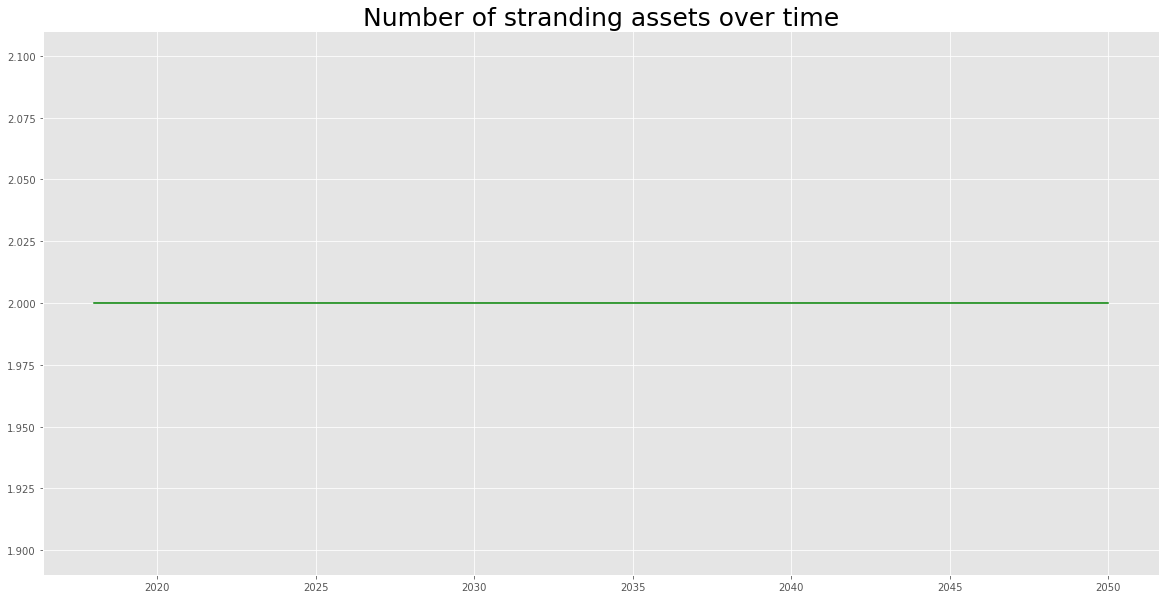

0.023571046217328348

In [247]:
p.VAR(end_year=2050, Diagram=True,crrem_data='uk_epc')